In [23]:
import pandas as pd

In [24]:
# 엑셀 파일 읽기
# AI_DATA = pd.read_excel('/Users/jinmh/Downloads/test_16model_AI_DATA_epoch9.xlsx', sheet_name='vggface_weights_09.h5')
AI_DATA = pd.read_excel('test_16model_AI_DATA_epoch9.xlsx', sheet_name='vggface_weights_09.h5')

# 데이터프레임 출력
print(AI_DATA)

         id  sex                                               auth  \
0      12.0   여성  https://sinor.s3.ap-northeast-2.amazonaws.com/...   
1      13.0   여성  https://sinor.s3.ap-northeast-2.amazonaws.com/...   
2      11.0   여성  https://sinor.s3.ap-northeast-2.amazonaws.com/...   
3       9.0   여성  https://sinor.s3.ap-northeast-2.amazonaws.com/...   
4      25.0   남자  https://sinor.s3.ap-northeast-2.amazonaws.com/...   
..      ...  ...                                                ...   
969  2490.0   남자  https://sinor.s3.ap-northeast-2.amazonaws.com/...   
970  2641.0   남자  https://sinor.s3.ap-northeast-2.amazonaws.com/...   
971  2715.0   남자  https://sinor.s3.ap-northeast-2.amazonaws.com/...   
972  2486.0   남자  https://sinor.s3.ap-northeast-2.amazonaws.com/...   
973     NaN  NaN                                                NaN   

                                              profiles  \
0    https://sinor.s3.ap-northeast-2.amazonaws.com/...   
1    https://sinor.s3.ap-northe

In [25]:
AI_DATA.columns

Index(['id', 'sex', 'auth', 'profiles', 'labeled_result_value(0: 미인증, 2: 인증)',
       'model', 'threshold', 'similarity_metric', 'time_values(초)', '평균유효시간',
       '유사도3d리스트(유사하면 1에 가까움)', 'verified', 'verified_values', 'Unnamed: 13',
       '총 사진 수', '총 유효시간', '점수', 'Unnamed: 17', '총 평균유효시간(초)', '정확도'],
      dtype='object')

In [26]:
# 열 추출
df = AI_DATA[['labeled_result_value(0: 미인증, 2: 인증)', '유사도3d리스트(유사하면 1에 가까움)', 'verified']]
df

# 'labeled_result_value(0: 미인증, 2: 인증)'이 0이면 부정쌍
# 'labeled_result_value(0: 미인증, 2: 인증)'이 2이면 긍정쌍

# 유사도3d리스트(유사하면 1에 가까움)가 distance. 사진이 여러개면 리스트로

,"labeled_result_value(0: 미인증, 2: 인증)",유사도3d리스트(유사하면 1에 가까움),verified
0,0.0,[],0.0
1,0.0,[],0.0
2,0.0,[],0.0
3,0.0,[],0.0
4,0.0,[],0.0
...,...,...,...
969,0.0,[],0.0
970,0.0,[],0.0
971,0.0,[[[0.36430004]]],0.0
972,0.0,[],0.0


In [27]:
df = df.rename(columns={'labeled_result_value(0: 미인증, 2: 인증)': 'decision'})
df = df.rename(columns={'유사도3d리스트(유사하면 1에 가까움)':'distance'})
df

,decision,distance,verified
0,0.0,[],0.0
1,0.0,[],0.0
2,0.0,[],0.0
3,0.0,[],0.0
4,0.0,[],0.0
...,...,...,...
969,0.0,[],0.0
970,0.0,[],0.0
971,0.0,[[[0.36430004]]],0.0
972,0.0,[],0.0


In [28]:
# 973번째 행 삭제 (NaN)
df = df.drop(973)
df

,decision,distance,verified
0,0.0,[],0.0
1,0.0,[],0.0
2,0.0,[],0.0
3,0.0,[],0.0
4,0.0,[],0.0
...,...,...,...
968,0.0,[],0.0
969,0.0,[],0.0
970,0.0,[],0.0
971,0.0,[[[0.36430004]]],0.0


In [29]:
df.verified.unique()

# verified = 0 : False
# verified = 1 : True

array([0., 1.])

---------여기까지 정리----------

In [30]:
# distance 열의 값이 빈 리스트인 행을 삭제
df = df[df['distance'] != '[]']
df

# 'decision'이 0이면 부정쌍
# 'decision'이 2이면 긍정쌍

# 'distance'가 사진이 여러개면 리스트로
# 'verified'가 1이면 True(동일인), 0이면 False(비동일인)

,decision,distance,verified
6,2.0,"[[[0.5000414]], [[0.6628759]]]",1.0
12,2.0,[[[0.55394155]]],1.0
17,2.0,"[[[0.7033797]], [[0.57080203]], [[0.37114412]]]",1.0
28,2.0,[[[0.4771246]]],0.0
30,0.0,"[[[0.30760646], [0.36482513]]]",0.0
...,...,...,...
908,0.0,[[[0.6573204]]],1.0
950,0.0,[[[0.6270333]]],1.0
963,0.0,[[[0.4247262]]],0.0
965,0.0,[[[0.35968763]]],0.0


In [31]:
import numpy as np
# decision이 2(인증)인데 verification이 True(1)로 나온경우
# 0.5보다 큰 값 중 가장 낮은값 찾기
pt_df = df.loc[(df['decision'] == 2) & (df['verified'] == 1), ['distance']]
pt_df

,distance
6,"[[[0.5000414]], [[0.6628759]]]"
12,[[[0.55394155]]]
17,"[[[0.7033797]], [[0.57080203]], [[0.37114412]]]"
44,"[[[0.35779467]], [[0.6478999]]]"
49,[[[0.6764326]]]
...,...
899,[[[0.5198012]]]
900,"[[[0.5476236]], [[0.66555893]]]"
902,[[[0.65897155]]]
903,[[[0.73350096]]]


In [32]:
def get_lowest_over5(x):
    lst = x.replace('[', '').replace(']', '').replace(' ', '').split(',')
    float_list = [float(x) for x in lst]
    filtered_list = list(filter(lambda x: float(x)>0.5, float_list))
    if len(filtered_list) == 0:
        return np.nan
    return min(filtered_list)

# get_lowest_over5 함수 적용하여 fin_distance column 생성
pt_df['fin_distance'] = pt_df['distance'].apply(get_lowest_over5)

In [33]:
# decision이 0(미인증)인데 verification이 False(0)로 나온경우
nf_df = df.loc[(df['decision'] == 0) & (df['verified'] == 0), ['distance']]
nf_df

# 0.5보다 작은 값 중 가장 큰 값 찾기

def get_lagest_under5(x):
    lst = x.replace('[', '').replace(']', '').replace(' ', '').split(',')
    float_list = [float(x) for x in lst]
    filtered_list = list(filter(lambda x: float(x)<0.5, float_list))
    if len(filtered_list) == 0:
        return np.nan
    return max(filtered_list)

# get_lowest_over5 함수 적용하여 fin_distance column 생성
nf_df['fin_distance'] = nf_df['distance'].apply(get_lagest_under5)
nf_df['fin_distance']

30     0.364825
38     0.297355
40     0.441505
242    0.457553
263    0.380755
281    0.465357
345    0.311765
352    0.369993
355    0.427027
383    0.231424
417    0.493096
477    0.414249
489    0.432818
493    0.357121
537    0.443697
541    0.438134
565    0.466785
629    0.445082
641    0.429311
721    0.493598
963    0.424726
965    0.359688
971    0.364300
Name: fin_distance, dtype: float64

In [34]:
# decision이 0(미인증)인데 verification이 True(1)로 나온경우
nt_df = df.loc[(df['decision'] == 0) & (df['verified'] == 1), ['distance']]
nt_df

# 0.5보다 큰 값중 가장 큰 값 찾기
def get_lagest_over5(x):
    lst = x.replace('[', '').replace(']', '').replace(' ', '').split(',')
    float_list = [float(x) for x in lst]
    filtered_list = list(filter(lambda x: float(x)>0.5, float_list))
    if len(filtered_list) == 0:
        return np.nan
    return max(filtered_list)

# get_lowest_over5 함수 적용하여 fin_distance column 생성
nt_df['fin_distance'] = nt_df['distance'].apply(get_lagest_over5)
nt_df['fin_distance']

48     0.508158
69     0.681998
152    0.521764
182    0.612971
246    0.597527
273    0.542199
278    0.532443
293    0.591841
315    0.665481
330    0.503133
439    0.623266
445    0.644636
470    0.723305
480    0.559775
497    0.509367
532    0.556738
551    0.585605
585    0.598336
598    0.613708
604    0.594712
606    0.514068
613    0.515742
625    0.537511
638    0.547267
661    0.564001
679    0.578927
714    0.549603
908    0.657320
950    0.627033
Name: fin_distance, dtype: float64

In [35]:
# decision이 2(인증)인데 verification이 False(0))로 나온경우
pf_df = df.loc[(df['decision'] == 2) & (df['verified'] == 0), ['distance']]
pf_df

# 0.5보다 작은 값 중 가장 작은 값 찾기
def get_lowest_under5(x):
    lst = x.replace('[', '').replace(']', '').replace(' ', '').split(',')
    float_list = [float(x) for x in lst]
    filtered_list = list(filter(lambda x: float(x)<0.5, float_list))
    if len(filtered_list) == 0:
        return np.nan
    return min(filtered_list)

# get_lowest_over5 함수 적용하여 fin_distance column 생성
pf_df['fin_distance'] = pf_df['distance'].apply(get_lowest_under5)
pf_df['fin_distance']

28     0.477125
34     0.407938
78     0.475328
100    0.466243
101    0.332070
         ...   
879    0.492682
889    0.493203
896    0.479380
898    0.475473
901    0.451448
Name: fin_distance, Length: 110, dtype: float64

In [42]:
# distance값 하나만 찾아서 다시 하나의 df로 합치기

# pt_df, nt_df, pf_df, nf_df DataFrame에서 fin_distance 컬럼만 추출하여 merge
# 추출된 fin_distance 컬럼 병합
fin_df = pd.concat([pf_df['fin_distance'], pt_df['fin_distance'], nt_df['fin_distance'], nf_df['fin_distance']])

# df DataFrame의 fin_distance 컬럼에 추가
df['fin_distance'] = fin_df

# DataFrame 출력
df = pd.DataFrame(df)
df


,decision,distance,verified,fin_distance
6,2.0,"[[[0.5000414]], [[0.6628759]]]",1.0,0.500041
12,2.0,[[[0.55394155]]],1.0,0.553942
17,2.0,"[[[0.7033797]], [[0.57080203]], [[0.37114412]]]",1.0,0.570802
28,2.0,[[[0.4771246]]],0.0,0.477125
30,0.0,"[[[0.30760646], [0.36482513]]]",0.0,0.364825
...,...,...,...,...
908,0.0,[[[0.6573204]]],1.0,0.657320
950,0.0,[[[0.6270333]]],1.0,0.627033
963,0.0,[[[0.4247262]]],0.0,0.424726
965,0.0,[[[0.35968763]]],0.0,0.359688


In [45]:
df.dtypes

decision        float64
distance         object
verified        float64
fin_distance    float64
dtype: object

In [69]:
df['decision'] = df['decision'].replace({2.0: 'Yes', 0.0: 'No'})
df['verified'] = df['verified'].replace({1.0: 'True', 0.0: 'False'})
df

,decision,distance,verified,fin_distance,prediction
6,Yes,"[[[0.5000414]], [[0.6628759]]]",True,0.500041,No
12,Yes,[[[0.55394155]]],True,0.553942,No
17,Yes,"[[[0.7033797]], [[0.57080203]], [[0.37114412]]]",True,0.570802,No
28,Yes,[[[0.4771246]]],False,0.477125,No
30,No,"[[[0.30760646], [0.36482513]]]",False,0.364825,No
...,...,...,...,...,...
908,No,[[[0.6573204]]],True,0.657320,No
950,No,[[[0.6270333]]],True,0.627033,No
963,No,[[[0.4247262]]],False,0.424726,No
965,No,[[[0.35968763]]],False,0.359688,No


In [66]:
tp_mean = round(df[df.decision == "Yes"].mean().values[0], 4) # 같은 사람일 경우 거리 평균을 구한 값
tp_std = round(df[df.decision == "Yes"].std().values[0], 4) # 같은 사람일 경우 거리 표준편차를 구한 값
fp_mean = round(df[df.decision == "No"].mean().values[0], 4) # 다른 사람일 경우 거리 평균을 구한 값
fp_std = round(df[df.decision == "No"].std().values[0], 4) # 다른 사람일 경우 거리 표준편차를 구한 값

print("참 긍정의 평균 :", tp_mean)
print("참 긍정의 표준편차 :", tp_std)
print("거짓 긍정의 평균 :", fp_mean)
print("거짓 긍정의 표준편차 :", fp_std)

참 긍정의 평균 : 0.5493
참 긍정의 표준편차 : 0.1147
거짓 긍정의 평균 : 0.5032
거짓 긍정의 표준편차 : 0.1072


/Users/jinmh/anaconda3/envs/CP37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/Users/jinmh/anaconda3/envs/CP37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/Users/jinmh/anaconda3/envs/CP37/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package s

In [67]:
yes_max = df[df.decision == "Yes"].fin_distance.max()
no_min = df[df.decision == "No"].fin_distance.min()

print("Yes의 최대값:", yes_max)
print("No의 최소값:", no_min)

Yes의 최대값: 0.784171
No의 최소값: 0.23142433


<AxesSubplot:ylabel='Density'>

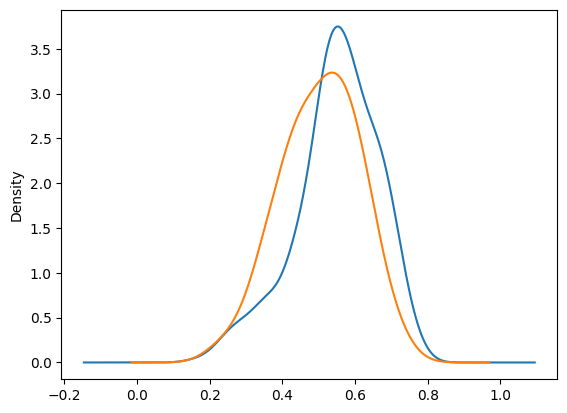

In [68]:
df[df.decision == "Yes"].fin_distance.plot.kde() # 파랑
df[df.decision == "No"].fin_distance.plot.kde() # 주황

In [70]:
from sklearn.metrics import confusion_matrix

In [75]:
# 시그마가 1이면 68%의 신뢰도 -> 신뢰구간이 짧지만 그만큼 신뢰구간에 들어가기 힘들고 신뢰도가 낮아짐!
# 임계값이 낮아서 True를 False로 결정할 가능성이 높음.
sigma = 1
threshold1 = round(tp_mean + sigma * tp_std, 4)
print(threshold1)

df["prediction"] = "No" #init
idx = df[df.fin_distance <= threshold1].index
df.loc[idx, 'prediction'] = 'Yes'

cm = confusion_matrix(df.decision.values, df.prediction.values)
print(cm)
tn, fp, fn, tp = cm.ravel()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)
print("recall(재현율) : ", recall)
print("precision(정밀도) : ", precision)
print("accuracy : ", accuracy)
print("f1score : ", f1)

0.664
[[  3  49]
 [ 67 355]]
recall(재현율) :  0.8412322274881516
precision(정밀도) :  0.8787128712871287
accuracy :  0.7552742616033755
f1score :  0.8595641646489104


In [74]:
# 시그마가 2면 95%의 신뢰도 -> 신뢰구간과 신뢰도를 생각하면 적당한 선택!
sigma = 2
threshold2 = round(tp_mean + sigma * tp_std, 4)
print(threshold2)

df["prediction"] = "No" #init
idx = df[df.fin_distance <= threshold2].index
df.loc[idx, 'prediction'] = 'Yes'

cm = confusion_matrix(df.decision.values, df.prediction.values)
print(cm)
tn, fp, fn, tp = cm.ravel()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)
print("recall(재현율) : ", recall)
print("precision(정밀도) : ", precision)
print("accuracy : ", accuracy)
print("f1score : ", f1)

0.7787
[[  0  52]
 [  1 421]]
recall(재현율) :  0.9976303317535545
precision(정밀도) :  0.8900634249471459
accuracy :  0.8881856540084389
f1score :  0.9407821229050279


In [73]:
# 시그마가 3이면 99.7%의 신뢰도 -> 신뢰도가 높은 이유는 신뢰구간이 넓어지기때문! 
# 임계값이 커져서 False도 True로 결정할 가능성이 높음 → 치명적
sigma = 3
threshold3 = round(tp_mean + sigma * tp_std, 4)
print(threshold3)

df["prediction"] = "No" #init
idx = df[df.fin_distance <= threshold3].index
df.loc[idx, 'prediction'] = 'Yes'

cm = confusion_matrix(df.decision.values, df.prediction.values)
print(cm)
tn, fp, fn, tp = cm.ravel()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)
print("recall(재현율) : ", recall)
print("precision(정밀도) : ", precision)
print("accuracy : ", accuracy)
print("f1score : ", f1)

0.8934
[[  0  52]
 [  0 422]]
recall(재현율) :  1.0
precision(정밀도) :  0.890295358649789
accuracy :  0.890295358649789
f1score :  0.9419642857142857
